In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict

In [2]:
# remove finals
# change rounds R1 into 1 etc.
stats = pd.read_csv("stats_with_ratings.csv")
finals = ["GF", "PF", "QF", "EF", "SF"]
stats = stats[~stats.Round.isin(finals)]
stats["Round"] = stats["Round"].apply(lambda x: int(x[1:]))

# sorting stats into each team for each round
stats = stats.sort_values(["Team", "Season", "Round"])
stats

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
61,Adelaide,"Sloane, Rory",17/3/90,182,83,Midfield,2012,1,31/3/12,137.0,...,0,9,16,0,0,2,0,0,86,8.306833
3425,Adelaide,"Dangerfield, Patrick",5/4/90,189,92,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,14,11,0,1,1,1,0,92,6.761757
3843,Adelaide,"van Berlo, Nathan",6/6/86,184,83,"Defender, Midfield",2012,1,31/3/12,137.0,...,0,8,13,0,2,2,0,0,84,7.160419
4707,Adelaide,"Vince, Bernie",2/10/85,186,86,Defender,2012,1,31/3/12,137.0,...,0,9,12,0,0,0,0,2,84,6.364417
4963,Adelaide,"Douglas, Richard",6/2/87,181,79,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,6,16,0,1,5,0,2,83,7.117061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46827,Western Bulldogs,"Lipinski, Patrick",17/7/98,187,84,"Midfield, Forward",2018,23,25/8/18,95.0,...,0,4,5,0,1,0,0,0,63,2.266935
53358,Western Bulldogs,"Greene, Fergus",20/12/97,187,75,Forward,2018,23,25/8/18,95.0,...,0,3,6,0,0,0,0,1,76,2.221262
57633,Western Bulldogs,"Morris, Dale",29/12/82,190,91,Defender,2018,23,25/8/18,95.0,...,0,3,7,0,0,11,0,0,93,1.565295
61127,Western Bulldogs,"Naughton, Aaron",30/11/99,195,89,Defender,2018,23,25/8/18,95.0,...,0,12,6,5,0,2,0,0,90,4.843483


In [3]:
# Now need to group the two teams that played each other together in each round
# Can be done by splitting up each round into seperate dataframes for each team, and linking
# The dataframes for the corresponding matches

# Will first try doing this with only one round, R1 from 2012
r12012 = stats[stats.Season == 2012]
r12012 = r12012[r12012.Round == 1]
r12012

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
61,Adelaide,"Sloane, Rory",17/3/90,182,83,Midfield,2012,1,31/3/12,137.0,...,0,9,16,0,0,2,0,0,86,8.306833
3425,Adelaide,"Dangerfield, Patrick",5/4/90,189,92,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,14,11,0,1,1,1,0,92,6.761757
3843,Adelaide,"van Berlo, Nathan",6/6/86,184,83,"Defender, Midfield",2012,1,31/3/12,137.0,...,0,8,13,0,2,2,0,0,84,7.160419
4707,Adelaide,"Vince, Bernie",2/10/85,186,86,Defender,2012,1,31/3/12,137.0,...,0,9,12,0,0,0,0,2,84,6.364417
4963,Adelaide,"Douglas, Richard",6/2/87,181,79,"Midfield, Forward",2012,1,31/3/12,137.0,...,0,6,16,0,1,5,0,2,83,7.117061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50066,Western Bulldogs,"Murphy, Robert",9/6/82,187,81,Defender,2012,1,1/4/12,87.0,...,0,4,13,1,0,2,3,0,90,4.453853
57106,Western Bulldogs,"Howard, Christian",19/3/91,186,82,Defender,2012,1,1/4/12,87.0,...,0,3,8,0,0,0,0,0,70,2.780396
57684,Western Bulldogs,"Markovic, Lukas",5/1/87,193,93,Defender,2012,1,1/4/12,87.0,...,0,4,9,0,0,10,0,0,97,2.699863
58813,Western Bulldogs,"Addison, Dylan",7/10/87,184,84,Forward,2012,1,1/4/12,87.0,...,0,6,6,1,0,6,0,0,89,2.856044


In [4]:
teams = {i for i in r12012["Team"]}
# Creates list of dataframes for each team
seperated = [r12012[r12012.Team == i].reset_index(drop = True) for i in teams]

# Dataframes look as such, for each team
seperated[0]

,Team,Player,D.O.B,Height,Weight,Position,Season,Round,Date,Score,...,BrownlowVotes,ContestedPossessions,UncontestedPossessions,ContestedMarks,MarksInside50,OnePercenters,Bounces,GoalAssists,PercentPlayed,Ratings
0,West Coast,"Rosa, Matt",23/11/86,191,84,Midfield,2012,1,1/4/12,136.0,...,0,8,22,1,1,2,2,0,86,9.828342
1,West Coast,"Selwood, Scott",27/3/90,186,88,Midfield,2012,1,1/4/12,136.0,...,1,7,21,0,1,0,0,3,85,8.868103
2,West Coast,"Shuey, Luke",2/6/90,183,90,Midfield,2012,1,1/4/12,136.0,...,2,13,11,0,0,2,2,1,81,6.198679
3,West Coast,"Gaff, Andrew",16/6/92,182,85,Midfield,2012,1,1/4/12,136.0,...,0,6,16,0,1,0,2,0,83,6.338000
4,West Coast,"Darling, Jack",13/6/92,191,95,Forward,2012,1,1/4/12,136.0,...,0,10,4,4,2,3,0,0,90,4.797272
5,West Coast,"Lynch, Quinten",24/1/83,192,103,Forward,2012,1,1/4/12,136.0,...,0,4,16,2,0,1,0,0,90,7.094696
6,West Coast,"Cox, Dean",1/8/81,203,107,"Forward, Ruck",2012,1,1/4/12,136.0,...,0,6,9,1,0,3,0,1,85,5.133495
7,West Coast,"Waters, Beau",30/3/86,188,88,Defender,2012,1,1/4/12,136.0,...,0,4,12,0,0,4,4,1,88,5.385420
8,West Coast,"Embley, Andrew",27/6/81,189,89,Midfield,2012,1,1/4/12,136.0,...,0,5,7,0,0,1,1,0,24,3.227418
9,West Coast,"Schofield, Will",24/1/89,196,92,Defender,2012,1,1/4/12,136.0,...,0,5,10,1,0,5,5,0,86,4.958625


In [5]:
# Now pair together the teams who played each other
pairings = []
done = []

for i in seperated:
    team = i.loc[0, "Team"]
    
    if team not in done:
        pairings.append(i)
        done.append(i.Team[0])
        done.append(i.Opposition[0])
        opp = i.Opposition[0]
        
        for j in seperated:
            if j.Team[0] == opp:
                pairings.append(j)
                
pairings = [pairings[i:i + 2] for i in range(0, len(pairings), 2)]

# Joins together the two dataframes for each match
pairings = [pd.concat(i).sort_values("Ratings", ascending = False).reset_index(drop = True) for i in pairings]

In [6]:
# Tallying votes for r1 2012, by giving 3 votes to the best player of each match, 2 votes to the second best player, and
# 1 vote to the third best player, as is done to award the Brownlow
votes = defaultdict(int)

for i in pairings:
    best = i.loc[0, "Player"]
    second_best = i.loc[1, "Player"]
    third_best = i.loc[2, "Player"]
    votes[best] += 3
    votes[second_best] += 2
    votes[third_best] += 1

sorted(votes.items(), key=lambda item: item[1], reverse = True)

[('Rosa, Matt', 3),
 ('Ablett, Gary', 3),
 ('Jack, Kieren', 3),
 ('Simpson, Kade', 3),
 ('Stanton, Brent', 3),
 ('Dal Santo, Nick', 3),
 ('Fyfe, Nat', 3),
 ('Adcock, Jed', 3),
 ('Swan, Dane', 3),
 ('Boyd, Matthew', 2),
 ('Thompson, Scott', 2),
 ('Bird, Craig', 2),
 ('Murphy, Marc', 2),
 ('Wells, Daniel', 2),
 ('Hartlett, Hamish', 2),
 ('Selwood, Joel', 2),
 ('Rockliff, Tom', 2),
 ('Pendlebury, Scott', 2),
 ('Selwood, Scott', 1),
 ('Sloane, Rory', 1),
 ('Kennedy, Adam', 1),
 ('Carrazzo, Andrew', 1),
 ('Watson, Jobe', 1),
 ('Goddard, Brendon', 1),
 ('Kelly, James', 1),
 ('Black, Simon', 1),
 ('Mitchell, Sam', 1)]

In [7]:
# All looks good here, successfully giving the top players the Brownlow votes for this one round

In [8]:
# Now, this process can be extended to all rounds for each season, to track who the stats would suggest the Brownlow
# Should go to for each season, from 2012 to 2018
rounds = range(1,24)
seasons = range(2012, 2019)

votes_by_season = dict()

for s in seasons:
    season = stats[stats.Season == s]
    
    # Using a defaultdict(dict) to not track total votes, but votes by round
    votes = defaultdict(dict)
    
    for r in rounds:
        round_ = season[season.Round == r]
        teams = {i for i in round_["Team"]}
        seperated = [round_[round_.Team == i].reset_index(drop = True) for i in teams]
        
        pairings = []
        done = []

        for i in seperated:
            team = i.loc[0, "Team"]
            if team not in done:
                pairings.append(i)
                done.append(i.Team[0])
                done.append(i.Opposition[0])
                opp = i.Opposition[0]
                for j in seperated:
                    if j.Team[0] == opp:
                        pairings.append(j)
                        
        pairings = [pairings[i:i + 2] for i in range(0, len(pairings), 2)]
        pairings = [pd.concat(i).sort_values("Ratings", ascending = False).reset_index(drop = True) for i in pairings]
        
        for i in pairings:
            best = i.loc[0, "Player"]
            second_best = i.loc[1, "Player"]
            third_best = i.loc[2, "Player"]
            votes[best][r] = 3
            votes[second_best][r] = 2
            votes[third_best][r] = 1
    
    votes_by_season[s] = votes

In [17]:
# The dict for each season will look like this
# Keys are the round, values are votes in that round
votes_by_season[2012]

defaultdict(dict,
            {'Rosa, Matt': {1: 3, 9: 3, 10: 2, 18: 1},
             'Boyd, Matthew': {1: 2,
              2: 1,
              3: 3,
              5: 2,
              7: 3,
              8: 3,
              9: 1,
              12: 3,
              14: 3,
              15: 3,
              16: 3,
              19: 1,
              22: 3,
              23: 2},
             'Selwood, Scott': {1: 1, 3: 1, 6: 3, 12: 3, 21: 3, 23: 2},
             'Ablett, Gary': {1: 3,
              2: 3,
              3: 3,
              7: 2,
              10: 3,
              12: 3,
              15: 1,
              16: 1,
              17: 3,
              18: 3,
              19: 2,
              20: 1,
              21: 3},
             'Thompson, Scott': {1: 2,
              2: 2,
              5: 2,
              7: 3,
              8: 2,
              12: 2,
              13: 2,
              14: 2,
              15: 2,
              18: 2,
              21: 3,
              23: 1

In [41]:
# Can then get total votes for each player for each season, by adding up all their votes for each round
totals = dict()
for s in seasons:
    season_votes = dict()
    for i in votes_by_season[s].items():
        total = 0
        for j in i[1].values():
            total += j
        season_votes[i[0]] = total
    totals[s] = season_votes

# Now can sort each year in descending order
for i in totals.keys():
    totals[i] = {k: v for k, v in sorted(totals[i].items(), key=lambda item: item[1], reverse = True)}

In [43]:
# Can view medal leaderboard for each season, e.g.
totals[2012]

{'Boyd, Matthew': 33,
 'Deledio, Brett': 32,
 'Ablett, Gary': 31,
 'Swan, Dane': 30,
 'Beams, Dayne': 26,
 'Thompson, Scott': 25,
 'Watson, Jobe': 23,
 'Dangerfield, Patrick': 22,
 'Stanton, Brent': 19,
 'Selwood, Joel': 19,
 'Cornes, Kane': 19,
 'Tuck, Shane': 19,
 'Cotchin, Trent': 18,
 'Griffen, Ryan': 17,
 'Simpson, Kade': 15,
 'Murphy, Marc': 15,
 'Kennedy, Josh P': 15,
 'Judd, Chris': 15,
 'Grigg, Shaun': 15,
 'Johnson, Steve': 15,
 'Jack, Kieren': 14,
 'Hannebery, Dan': 14,
 'Selwood, Scott': 13,
 'Rockliff, Tom': 13,
 'Scotland, Heath': 12,
 'Wells, Daniel': 11,
 'Dal Santo, Nick': 11,
 'Mitchell, Sam': 11,
 'Gaff, Andrew': 11,
 'Franklin, Lance': 11,
 'Armitage, David': 11,
 'Sidebottom, Steele': 11,
 'OKeefe, Ryan': 11,
 'McVeigh, Jarrad': 11,
 'Zorko, Dayne': 11,
 'Harvey, Brent': 10,
 'Montagna, Leigh': 10,
 'Shuey, Luke': 10,
 'Mundy, David': 10,
 'Rosa, Matt': 9,
 'Goddard, Brendon': 9,
 'Masten, Chris': 9,
 'Barlow, Michael': 9,
 'Swallow, Andrew': 9,
 'Chapman, Paul': 9

In [44]:
# Now can find actual Brownlow votes from those years from the dataset
actual_votes_by_season = dict()
for i in seasons:
    actual_votes = dict()
    players = stats[stats.Season == i].groupby("Player")
    players = players.sum().sort_values("BrownlowVotes", ascending = False)
    for j in players.index:
        if not players.loc[j, "BrownlowVotes"]:
            break
        actual_votes[j] = players.loc[j, "BrownlowVotes"]
    actual_votes_by_season[i] = (actual_votes)

In [45]:
# e.g. for 2012
actual_votes_by_season[2012]

{'Watson, Jobe': 30,
 'Mitchell, Sam': 26,
 'Cotchin, Trent': 26,
 'Swan, Dane': 25,
 'Thompson, Scott': 25,
 'Ablett, Gary': 24,
 'Dangerfield, Patrick': 23,
 'Beams, Dayne': 19,
 'Hayes, Lenny': 19,
 'Kennedy, Josh P': 19,
 'Selwood, Scott': 15,
 'Pendlebury, Scott': 15,
 'Jack, Kieren': 15,
 'Pavlich, Matthew': 15,
 'Stanton, Brent': 14,
 'Selwood, Joel': 14,
 'Fyfe, Nat': 14,
 'Jones, Nathan': 14,
 'Deledio, Brett': 13,
 'Sewell, Brad': 13,
 'Franklin, Lance': 12,
 'Hannebery, Dan': 12,
 'Mundy, David': 12,
 'Judd, Chris': 12,
 'Kelly, James': 12,
 'Griffen, Ryan': 11,
 'Grigg, Shaun': 11,
 'Sloane, Rory': 11,
 'OKeefe, Ryan': 11,
 'Shuey, Luke': 11,
 'Murphy, Marc': 11,
 'Boyd, Matthew': 10,
 'McLean, Brock': 10,
 'Dal Santo, Nick': 10,
 'Swallow, Andrew': 10,
 'Tuck, Shane': 10,
 'Naitanui, Nic': 10,
 'Hawkins, Tom': 10,
 'Bolton, Jude': 10,
 'Scotland, Heath': 9,
 'Pearce, Clancee': 9,
 'Priddis, Matt': 9,
 'Wells, Daniel': 9,
 'Ebert, Brad': 9,
 'Cox, Dean': 9,
 'Petrie, Drew':

In [54]:
# Now, we can see how accurately the rating system gave out brownlow votes
# Let's see how many players the ratings system thought should get votes for 2018
len(totals[2018])

191

In [55]:
# And how many actually got votes for 2018
len(actual_votes_by_season[2018])

210

In [57]:
# The ratings system missed out on giving votes to 19 people for 2018, and in general seems to give fewer unique players
# votes, than the umpires do:
for i in seasons:
    print(len(totals[i]), len(actual_votes_by_season[i]))

189 216
206 215
196 205
193 199
175 204
182 198
191 210


In [60]:
# I find this somewhat surprising, as I expected that the umpires may be more susceptible to giving 'big-name' players
# more votes, and therefore giving fewer votes to less famous players, however the ratings system condenses the votes 
# to a pool of fewer players than the umpires, contrary to this assumption.

In [82]:
# Now, let's have a look at the ratings system's top 10 vote getters compared to the actual top 10 for each season

accuracies = dict()

for i in seasons:
    pred = totals[i]
    actual = actual_votes_by_season[i]
    
    # Getting names of top 10 players
    pred_top10 = [i[0] for i in list(pred.items())[:10]]
    actual_top10 = [i[0] for i in list(actual.items())[:10]]
    
    shared = len(set(pred_top10) & set(actual_top10))
    accuracies[i] = shared

In [83]:
accuracies

{2012: 6, 2013: 4, 2014: 3, 2015: 3, 2016: 6, 2017: 4, 2018: 4}

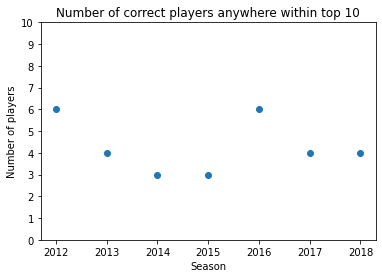

In [127]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(accuracies.keys(), accuracies.values())
ax.set_title("Number of correct players anywhere within top 10")
ax.set_xlabel("Season")
ax.set_ylabel("Number of players")
ax.set_yticks(range(11))
plt.show()
fig.savefig("withintop10.png")

In [90]:
sum(accuracies.values()) / (10 * 7)

0.42857142857142855

In [ ]:
# As we can see, on average, the ratings system places ~43% of the actual top 10 players within its generated top 10
# How well are they placed, though? How far from their actual position?

In [94]:
correct_place = dict()
for i in seasons:
    pred = totals[i]
    actual = actual_votes_by_season[i]
    
    # Getting names of top 10 players
    pred_top10 = [i[0] for i in list(pred.items())[:10]]
    actual_top10 = [i[0] for i in list(actual.items())[:10]]
    
    correct = 0
    for j in range(len(pred_top10)):
        if pred_top10[j] == actual_top10[j]:
            correct += 1
    correct_place[i] = correct
    

In [95]:
correct_place

{2012: 1, 2013: 1, 2014: 0, 2015: 2, 2016: 4, 2017: 1, 2018: 1}

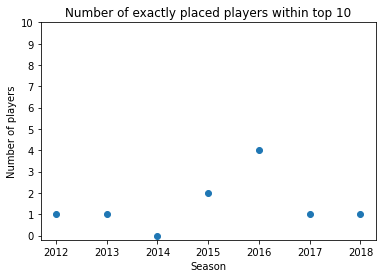

In [129]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(correct_place.keys(), correct_place.values())
ax.set_title("Number of exactly placed players within top 10")
ax.set_xlabel("Season")
ax.set_ylabel("Number of players")
ax.set_yticks(range(11))
plt.show()
fig.savefig("exacttop10.png")

In [97]:
sum(correct_place.values()) / (10 * 7)

0.14285714285714285

In [ ]:
# So, ~14% of the top 10 (or ~1.4 players) is correctly assigned by the ratings system